## Introduction

L'objectif de ce petit notebook est de créer une représentation visuelle d'un réseau représentant les groupes associés par les mots clés les plus utilisés sur le site StackOverflow.

Le graphique est généré en utilisant la bibliothèque NetworkX en Python, avec une disposition de type "spring layout" qui optimise la position des nœuds pour minimiser les chevauchements et maximiser la lisibilité. Le paramètre k de cette disposition a été ajusté pour augmenter l'espace entre les nœuds, facilitant ainsi la visualisation des connexions et des groupes.

Les couleurs des nœuds sont définies par une palette prédéfinie, où chaque groupe est représenté par une couleur distincte. Les tailles des nœuds sont proportionnelles à leur "nodesize", permettant de visualiser rapidement les nœuds les plus importants ou influents dans le réseau.

## Importation des modules

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Importation des données

In [9]:
df_nodes = pd.read_csv(r'../data/stack_network_nodes.csv')
df_edges = pd.read_csv(r'../data/stack_network_links.csv')

## Création du Graph

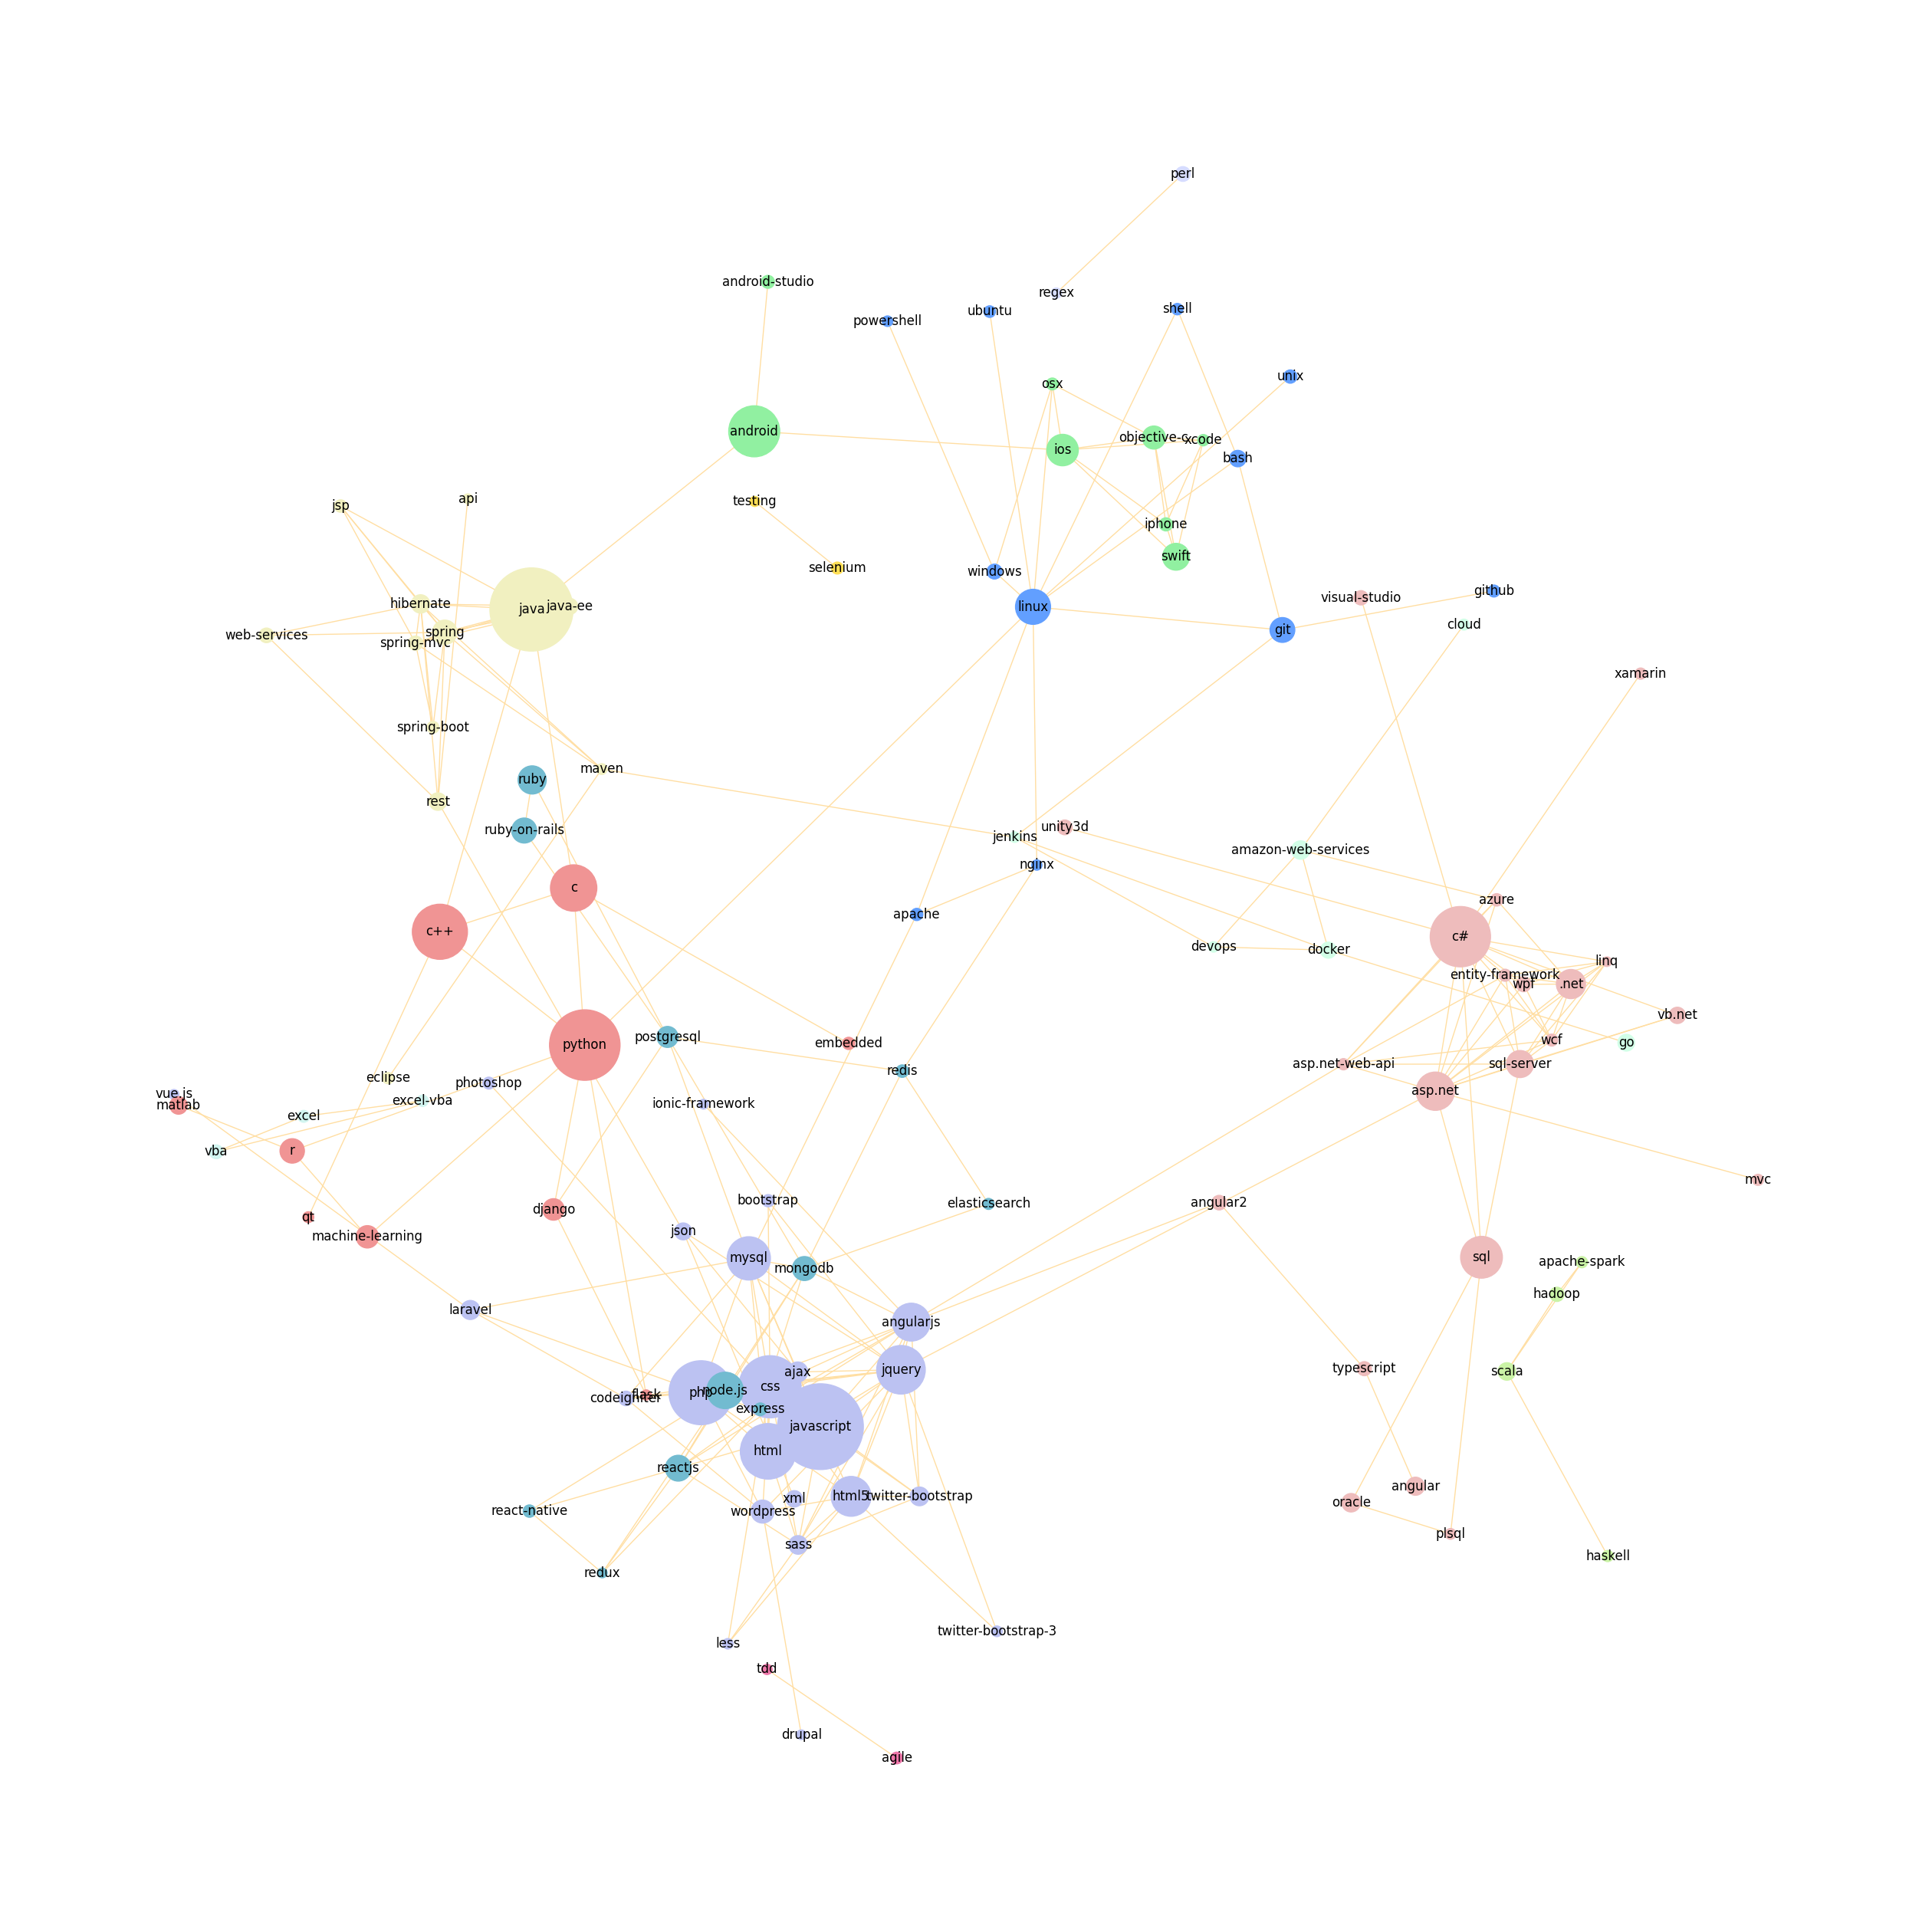

In [14]:
# Initialisation du graph
G = nx.Graph()

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group = row['group'], nodesize = row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize = (25, 25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

nx.draw(G, node_color = colors, node_size = sizes, pos = nx.spring_layout(G, k = 1, iterations = 50), **options)
ax = plt.gca()
plt.show()